## Exploratory Data Analysis - Pt 2
### Data Visualization 

In [18]:
#import libraries and read the csv file
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fire_df = pd.read_csv("data/fire.csv")

In [19]:
#repeat cleaning steps from part 1
fire_df['CREATE_TIME_INCIDENT'] = pd.to_datetime(fire_df['CREATE_TIME_INCIDENT'], format='%m/%d/%Y %I:%M:%S %p')
fire_df['ARRIVAL_TIME_PRIMARY_UNIT'] = pd.to_datetime(fire_df['ARRIVAL_TIME_PRIMARY_UNIT'], format='%m/%d/%Y %I:%M:%S %p')
fire_df['CLOSED_TIME_INCIDENT'] = pd.to_datetime(fire_df['CLOSED_TIME_INCIDENT'], format='%m/%d/%Y %I:%M:%S %p')
fire_df['DISPATCH_TIME_PRIMARY_UNIT'] = pd.to_datetime(fire_df['DISPATCH_TIME_PRIMARY_UNIT'], format='%m/%d/%Y %I:%M:%S %p')
fire_df.dtypes

ADDRESS_X                             object
LATITUDE_X                           float64
LONGITUDE_X                          float64
AGENCY                                object
CREATE_TIME_INCIDENT          datetime64[ns]
DISPOSITION_TEXT                      object
EVENT_NUMBER                          object
INCIDENT_TYPE_ID                      object
INCIDENT_TYPE_DESC                    object
NEIGHBORHOOD                          object
ARRIVAL_TIME_PRIMARY_UNIT     datetime64[ns]
BEAT                                  object
CLOSED_TIME_INCIDENT          datetime64[ns]
DISPATCH_TIME_PRIMARY_UNIT    datetime64[ns]
CFD_INCIDENT_TYPE                     object
CFD_INCIDENT_TYPE_GROUP               object
dtype: object

In [20]:
#derive variables
import datetime

TTA = pd.to_timedelta(fire_df['ARRIVAL_TIME_PRIMARY_UNIT'] - fire_df['DISPATCH_TIME_PRIMARY_UNIT'])
TTC = pd.to_timedelta(fire_df['CLOSED_TIME_INCIDENT'] - fire_df['CREATE_TIME_INCIDENT'])

In [21]:
## add the derived variables to the main dataframe
TTA_int = TTA / np.timedelta64(1, 'm')
TTA_int
fire_df['TTA'] = TTA_int

TTC_int = TTC / np.timedelta64(1, 'm')
TTC_int
fire_df['TTC'] = TTC_int

In [5]:
#remove values with negative times
print(len(fire_df))

clean_df = fire_df[fire_df['TTA'] > 0]
clean_df = clean_df[clean_df['TTC'] > 0]

print(len(clean_df))

256308
211773


In [6]:
clean_df = clean_df[clean_df['TTA'] < clean_df['TTC']]

In [7]:
#remove outliers
clean_df = clean_df[clean_df['TTA'] < 500]
clean_df = clean_df[clean_df['TTC'] < 1000]
len(clean_df)

211472

## Big Picture Graphs
* Start with overall trends

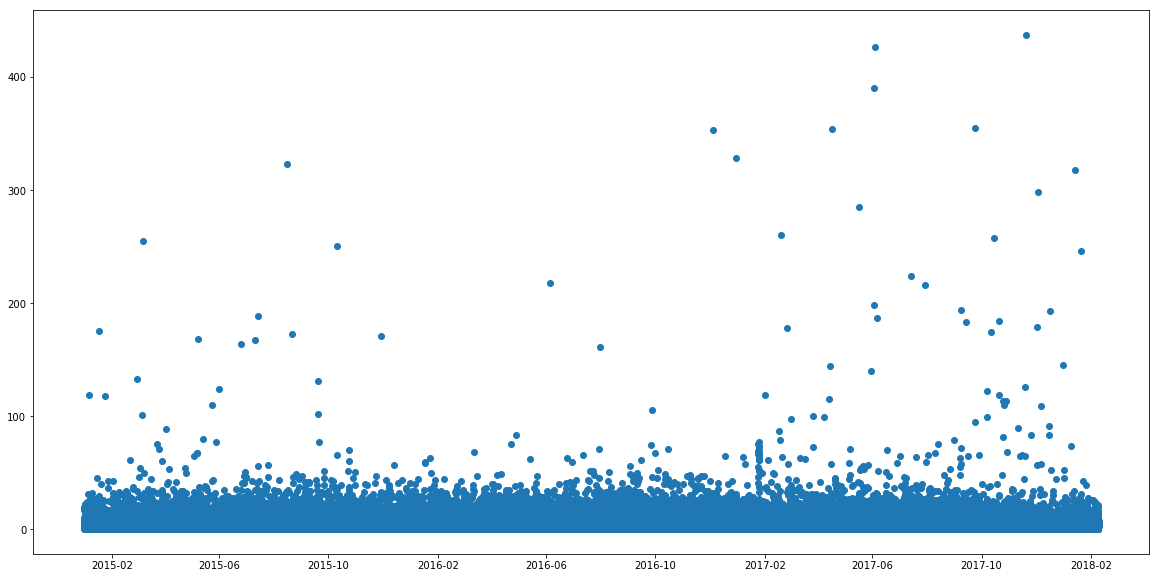

In [69]:
by_date = clean_df.groupby(pd.DatetimeIndex(clean_df['CREATE_TIME_INCIDENT']).normalize())
plt.figure(figsize=(20,10))
plt.plot_date(clean_df['CREATE_TIME_INCIDENT'], clean_df['TTA'])

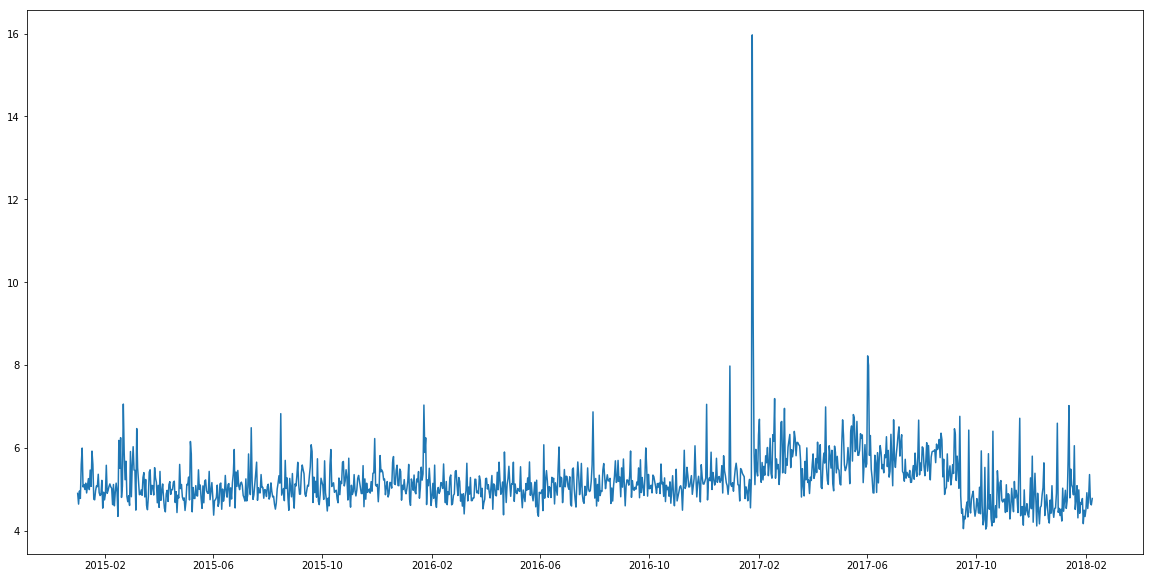

In [92]:
# The above is not a great way to gain insight from our data. Let's try a line graph
mean_TTA = by_date['TTA'].mean()
mean_TTA
plt.figure(figsize=(20,10))
plt.plot(mean_TTA)

In [95]:
mean_TTA.describe()

count    1135.000000
mean        5.196810
std         0.627248
min         4.034414
25%         4.847181
50%         5.106499
75%         5.442784
max        15.970098
Name: TTA, dtype: float64

In [104]:
#patterns may emerge by grouping the data. What if we look at the mean by month?
by_month = clean_df.groupby(clean_df['CREATE_TIME_INCIDENT'].dt.to_period('M'))
mean_monthly_TTA = by_month['TTA'].mean()
mean_monthly_TTA

CREATE_TIME_INCIDENT
2015-01    5.069071
2015-02    5.207248
2015-03    5.177375
2015-04    4.914848
2015-05    5.014391
2015-06    4.970128
2015-07    5.075413
2015-08    5.003573
2015-09    5.194604
2015-10    5.112156
2015-11    5.079432
2015-12    5.204734
2016-01    5.216720
2016-02    5.003036
2016-03    4.925489
2016-04    5.088484
2016-05    4.968926
2016-06    5.123464
2016-07    5.141361
2016-08    5.152583
2016-09    5.187561
2016-10    5.054812
2016-11    5.139256
2016-12    5.376587
2017-01    5.605390
2017-02    5.747062
2017-03    5.704721
2017-04    5.624558
2017-05    5.918219
2017-06    5.769862
2017-07    5.664445
2017-08    5.728679
2017-09    5.049877
2017-10    4.745813
2017-11    4.748137
2017-12    4.755723
2018-01    4.817929
2018-02    4.774648
Freq: M, Name: TTA, dtype: float64

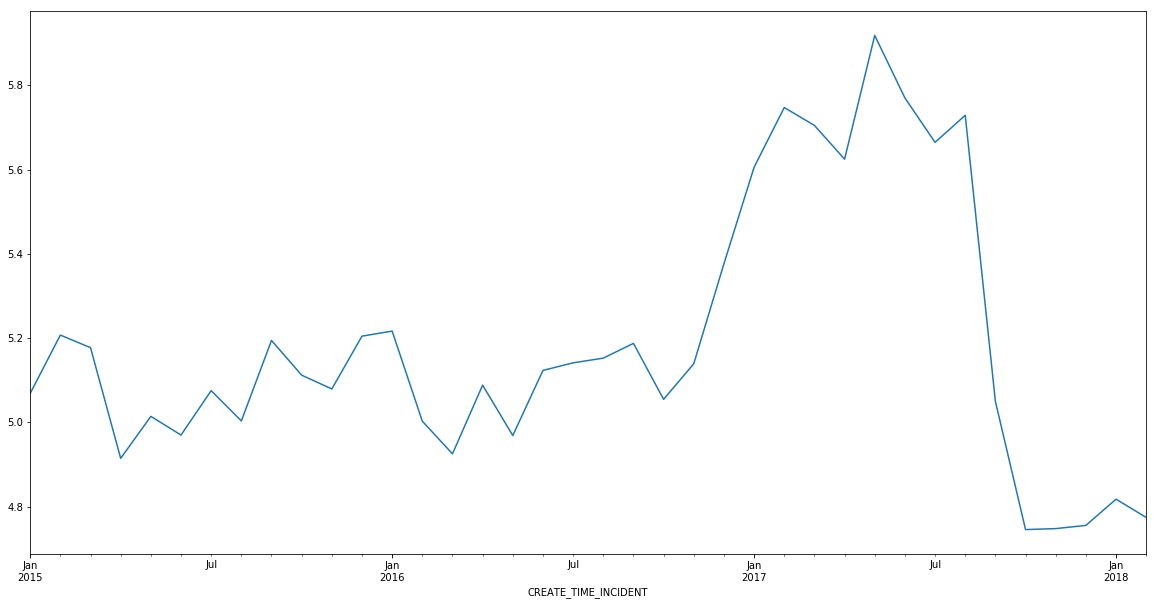

In [123]:
plt.figure(figsize=(20,10))
mean_monthly_TTA.plot()

## Pandas GroupBy Objects
* We may want to examine the data by neighborhood, incident type, disposition, etc.. 


NameError: name 'index' is not defined